<a href="https://colab.research.google.com/github/ledinhthang20146426/AI_File/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/CheckCovid_AI/Train_Testlung',target_size=(150,150), batch_size=36, class_mode='categorical')

Found 251 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

In [ ]:
#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(3,activation='softmax'))

In [ ]:
#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
train=model.fit(training_set,epochs=20,batch_size=36,verbose=1)

Epoch 1/20
7/7 [==============================] - 47s 6s/step - loss: 1.0507 - accuracy: 0.5896
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 0.5656 - accuracy: 0.7888
Epoch 3/20
7/7 [==============================] - 33s 5s/step - loss: 0.4848 - accuracy: 0.7968
Epoch 4/20
7/7 [==============================] - 29s 4s/step - loss: 0.3525 - accuracy: 0.8685
Epoch 5/20
7/7 [==============================] - 29s 4s/step - loss: 0.2807 - accuracy: 0.8964
Epoch 6/20
7/7 [==============================] - 29s 4s/step - loss: 0.3627 - accuracy: 0.8685
Epoch 7/20
7/7 [==============================] - 29s 4s/step - loss: 0.2488 - accuracy: 0.9044
Epoch 8/20
7/7 [==============================] - 29s 4s/step - loss: 0.2436 - accuracy: 0.9004
Epoch 9/20
7/7 [==============================] - 29s 4s/step - loss: 0.2411 - accuracy: 0.9283
Epoch 10/20
7/7 [==============================] - 29s 4s/step - loss: 0.2467 - accuracy: 0.9124
Epoch 11/20
7/7 [======================

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0762002095580101
Train Accuracy 0.980079710483551


In [ ]:
# Lưu 
model.save("/content/drive/MyDrive/covid19_data")

In [ ]:
model_1=load_model('/content/drive/MyDrive/covid19_data')

1/1 [==============================] - 0s 253ms/step
normal


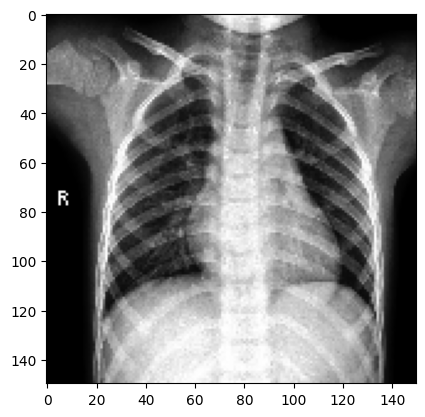

1/1 [==============================] - 0s 66ms/step
covid


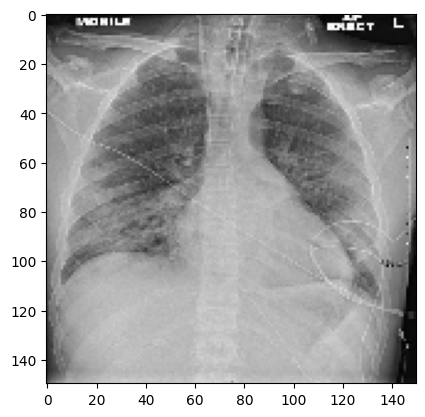

1/1 [==============================] - 0s 70ms/step
normal


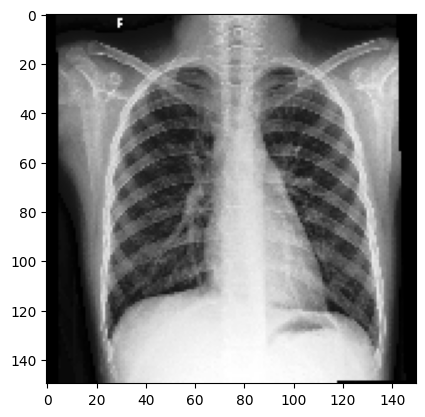

1/1 [==============================] - 0s 69ms/step
normal


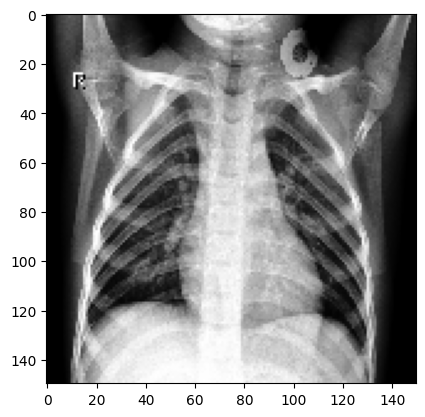

1/1 [==============================] - 0s 43ms/step
covid


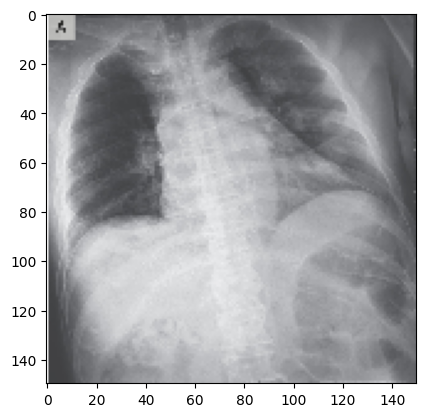

1/1 [==============================] - 0s 42ms/step
covid


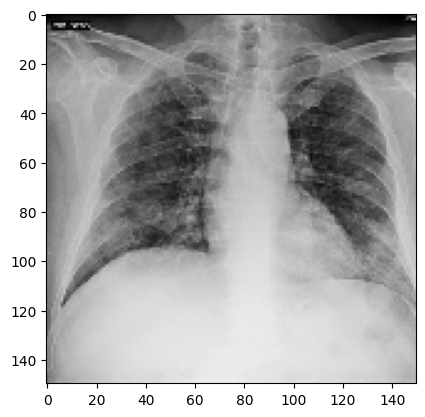

1/1 [==============================] - 0s 42ms/step
normal


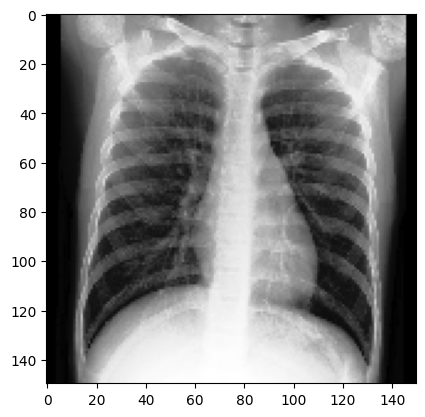

1/1 [==============================] - 0s 48ms/step
covid


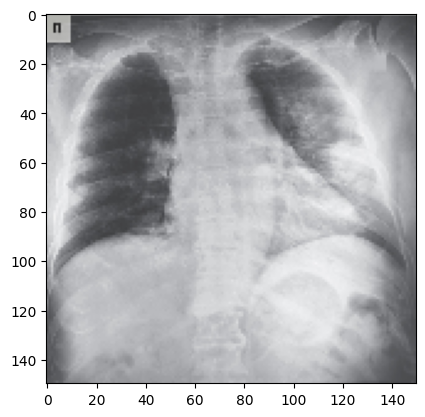

1/1 [==============================] - 0s 42ms/step
viral preumonia


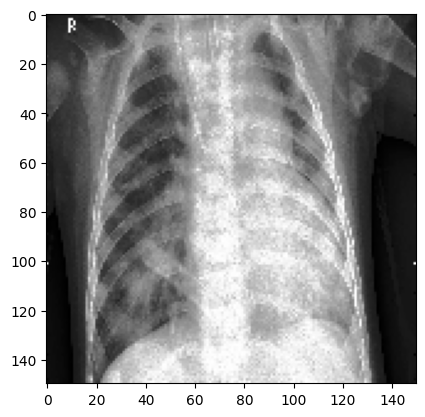

1/1 [==============================] - 0s 42ms/step
viral preumonia


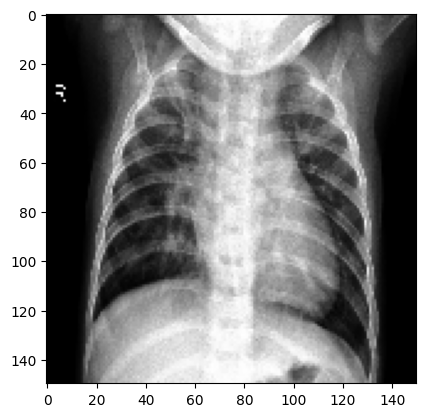

1/1 [==============================] - 0s 41ms/step
viral preumonia


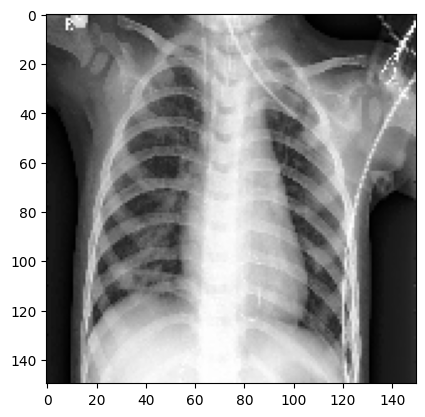

1/1 [==============================] - 0s 49ms/step
covid


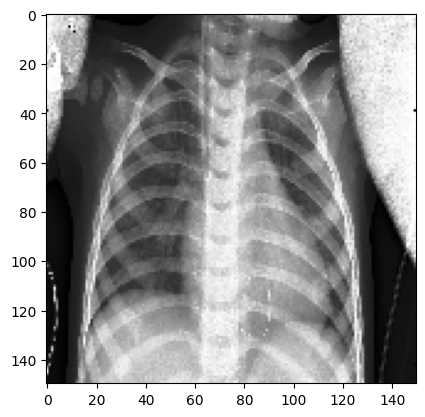

In [ ]:
folder="/content/drive/MyDrive/data_AI/test_testlung/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['covid', 'normal','viral preumonia']
  print(class_name[result])
  plt.show()

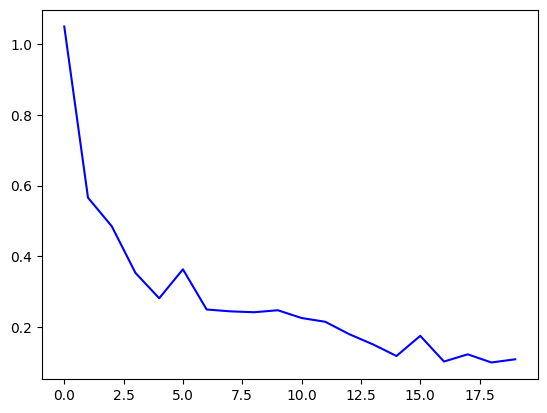

In [ ]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()  